# Assignment 1: k-nearest neighbors (100 points)

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

==> *Write*
* *Priyatham Kumanduri* 
* *3497429* 
* *Electrical Engineering*
* *M.Sc.*

*of all assignment group participants here.* (double klick here to edit)*

In [ ]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np


def load_wine_dataset():
    from sklearn import datasets
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    return X, y
    
X, y = load_wine_dataset()


## Task 1: Visualization and Preprocessing (25 points)

1) *(5 Points)* Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: [http://archive.ics.uci.edu/ml/datasets/Wine).


==> *Write your response here.* (double klick here to edit)

2) *(5 Points)* Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [ ]:
# Implement your solution here.
samples = lambda x: print("Number of samples =", x.shape[0])
samples_per_class = lambda x: print("Number of samples per class =", x.shape[1])
samples(X)
samples_per_class(X)
features = np.array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
for i in range(X.shape[1]):
  print("The mean of", features[i], "=", mean[i])
  print("The standard deviation of", features[i], "=", std[i])

Number of samples = 178
Number of samples per class = 13
The mean of Alcohol = 13.000617977528083
The standard deviation of Alcohol = 0.809542914528517
The mean of Malic acid = 2.336348314606741
The standard deviation of Malic acid = 1.1140036269797895
The mean of Ash = 2.3665168539325854
The standard deviation of Ash = 0.2735722944264325
The mean of Alcalinity of ash = 19.49494382022472
The standard deviation of Alcalinity of ash = 3.330169757658213
The mean of Magnesium = 99.74157303370787
The standard deviation of Magnesium = 14.242307673359807
The mean of Total phenols = 2.295112359550562
The standard deviation of Total phenols = 0.6240905641965366
The mean of Flavanoids = 2.0292696629213474
The standard deviation of Flavanoids = 0.9960489503792328
The mean of Nonflavanoid phenols = 0.36185393258426973
The standard deviation of Nonflavanoid phenols = 0.12410325988364797
The mean of Proanthocyanins = 1.5908988764044953
The standard deviation of Proanthocyanins = 0.5707488486199377
T

3) *(5 Points)* Visualize the variables *alcohol* and *magnesium* in a scatter plot (*alcohol* on the x-axis, *magnesium* on the y-axis). Color each point of the plot according to its class.

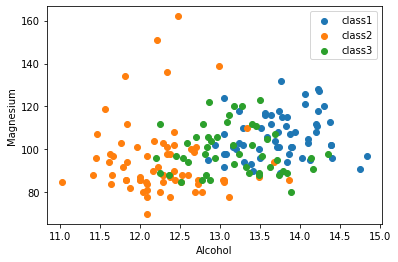

In [ ]:
classes = ['class1', 'class2', 'class3']
fig, axs = plt.subplots(1, 1)
for class_index, classnames in enumerate(classes):
    axs.scatter(X[y == class_index, 0], X[y == class_index, 4], label=classnames)
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.legend()
plt.show()

4) *(5 Points)* Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [ ]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    import random
    z = np.arange(X.shape[0])
    np.random.shuffle(z)
    xshuff = X[z]
    yshuff = y[z]
    splitpercent = round(0.7*X.shape[0]) # 125
    X_train = xshuff[:splitpercent] #xshuff[0:125]
    y_train = yshuff[:splitpercent]
    X_test = xshuff[splitpercent:]
    y_test = yshuff[splitpercent:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

(125, 13)
(125,)


5) *(5 Points)* kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [ ]:
# Implement your solution here
xmin = np.min(X_train, axis =0)
xmax = np.max(X_train, axis =0)
def minmaxscale(X):
  Xsc = np.divide(np.subtract(X, xmin), xmax - xmin)
  return Xsc
X_train = minmaxscale(X_train)
X_test = minmaxscale(X_test)

## Task 2: k-nearest neighbors (50 Points)
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [ ]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Implement your solution here.
        
        distance_pairs = np.zeros(self.X.shape[0])
        labels_final = np.zeros(X.shape[0])
        nearest_samples = np.zeros([self.k, X.shape[1]])
        nearest_labels = np.zeros(self.k)

        if weights == 'uniform':
          distance = euclidean_distance
        
        else:
          distance = self.weights

        for x1 in range(X.shape[0]):
          weight_labels = np.zeros(len(np.unique(self.y)))

          for x2 in range(self.X.shape[0]):
            distance_pairs[x2] = distance(X[x1], self.X[x2])   #Finding distance pairs for every sample
          nearest_samples = np.argsort(distance_pairs, axis=0)[:self.k]  #K nearest samples
          nearest_labels = self.y[nearest_samples]                 # Finding class labels of k nearest samples
          for label in range(self.k):
            if self.weights == 'uniform':
              weight_labels[int(nearest_labels[label])] += 1
            else:
              weight_labels[int(nearest_labels[label])] += 1/self.weights(X[x1], nearest_samples[label])
          # majority class label selection
          labels_final[x1] = np.argmax(weight_labels)

        return labels_final
        
    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

## Task 3: Evaluation (25 Points)

1) *(10 Points)* Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [ ]:
def confusion_matrix(y_pred, y_true, given_class):
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0


  for i in range(len(y_pred)):
    if y_pred[i] == y_true[i] and y_true[i] == given_class:
      true_positive = true_positive + 1
    elif y_pred[i] != y_true[i] and y_true[i] == given_class:
      false_positive = false_positive + 1
    elif y_pred[i] == y_true[i] and y_true[i] != given_class:
      true_negative = true_negative + 1 
    else:
        false_negative = false_negative + 1
  #print(true_positive, true_negative, false_positive, false_negative)
  return true_positive, true_negative, false_positive, false_negative
    


def precision(y_pred, y_true):
    # Implement your solution here.
    #precisions = []
    precisions = np.zeros(len(np.unique(np.concatenate((y_pred, y_true)))))
    #print(classlabels)
    for classlabel in range(len(precisions)):
      #print(classlabel)
      t_p, t_n, f_p, f_n = confusion_matrix(y_pred, y_true, classlabel)
      if t_p + f_p != 0:
        p = t_p/(t_p + f_p)
      else:
        p = 0
      precisions[classlabel] = p
    return np.mean(precisions)


def recall(y_pred, y_true):
    # Implement your solution here.
    #recalls = []
    recalls = np.zeros(len(np.unique(np.concatenate((y_pred, y_true)))))
    classlabels = np.unique(np.concatenate((y_pred, y_true)))
    for classlabel in range(len(recalls)):
      t_p, t_n, f_p, f_n = confusion_matrix(y_pred, y_true, classlabel)
      r = t_p/(t_p + f_n)
      recalls[classlabel] = r
    return np.mean(recalls)

def f1score(y_pred, y_true):
    # Implement your solution here.
    #f1scores = []
    f1scores = np.zeros(len(np.unique(np.concatenate((y_pred, y_true)))))
    #for classlabel in range(len(f1scores)):
      #t_p, t_n, f_p, f_n = confusion_matrix(y_pred, y_true, classlabel)
      #if t_p + f_p == 0:
      #  p = 0
      #else:
    p = precision(y_pred, y_true)
    r = recall(y_pred, y_true)
    f = 2 * (p * r)/(p + r)
    f1scores = f
    return f1scores

2) *(10 Points)* Evaluate the performance of kNN with uniform weighting on the Wine dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

uniform
k = 1
precision test = 0.9696969696969697
recall test= 0.9232456140350878
f1score test = 0.9459013515885554
precision train = 1.0
recall train= 1.0
f1score train = 1.0 

k = 5
precision test = 0.9848484848484849
recall test= 0.9592592592592593
f1score test = 0.9718854635723359
precision train = 0.9727891156462585
recall train= 0.9359267734553777
f1score train = 0.9540019899848303 

k = 9
precision test = 1.0
recall test= 1.0
f1score test = 1.0
precision train = 0.9727891156462585
recall train= 0.9359267734553777
f1score train = 0.9540019899848303 

euclidean
k = 1
precision test = 0.9696969696969697
recall test= 0.9232456140350878
f1score test = 0.9459013515885554
precision train = 1.0
recall train= 1.0
f1score train = 1.0 

k = 5
precision test = 0.9545454545454546
recall test= 0.8911764705882353
f1score test = 0.9217731421121252
precision train = 0.979591836734694
recall train= 0.9507507507507508
f1score train = 0.9649558376246928 

k = 9
precision test = 0.9545454545454546
r

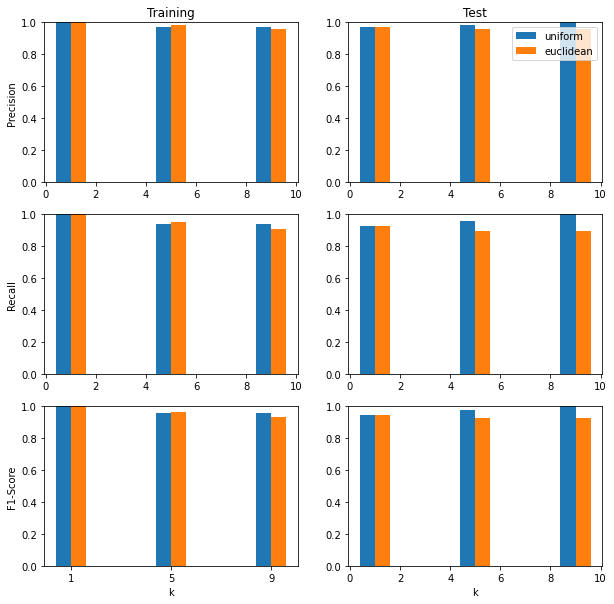

In [ ]:
k_set = [1, 5, 9]
weighting = ['uniform', euclidean_distance]
#Evaluation_parameters = np.zeros((6, 3))
Ep = []
for weight in weighting:
  if weight == 'uniform':
    weights = 'uniform'
    print('uniform')
  else:
    weights = euclidean_distance
    print('euclidean')
  for k in k_set:
    classifier = KNearestNeighbors(k = k, weights = weights)
    classifier.fit(X_train, y_train)
    yexp_train = classifier.predict(X_train)
    yexp_test = classifier.predict(X_test)
    print('k =', k )
    precision_test = precision(yexp_test, y_test)
    recall_test = recall(yexp_test, y_test)
    f1score_test = f1score(yexp_test, y_test)
    precision_train = precision(yexp_train, y_train)
    recall_train = recall(yexp_train, y_train)
    f1score_train = f1score(yexp_train, y_train)
    print('precision test =', precision_test)
    print('recall test=', recall_test)
    print('f1score test =', f1score_test)
    print('precision train =', precision_train)
    print('recall train=', recall_train)
    print('f1score train =', f1score_train, '\n')
    parameters = [[precision_train, recall_train, f1score_train], [precision_test, recall_test, f1score_test]]
    Ep.append(parameters)
Ep = np.array(Ep)
#print(Ep)
ks = np.array(k_set)
fig, axs = plt.subplots(3, 2, figsize = (10, 10))
for rows in range(3):
  for columns in range(2):
    axs[rows, columns].bar(ks-0.3, Ep[:3, columns, rows], width = 0.6, label = 'uniform')
    axs[rows, columns].bar(ks+0.3, Ep[3:, columns, rows], width = 0.6, label = 'euclidean')
    axs[rows, columns].set_ylim((0.0, 1.0))
axs[0, 0].set_ylabel('Precision')
axs[1, 0].set_ylabel('Recall')
axs[2, 0].set_ylabel('F1-Score')
axs[0, 0].set_title('Training')
axs[0, 1].set_title('Test')
axs[-1, 0].set_xlabel('k')
axs[-1, 1].set_xlabel('k')
axs[-1, 0].set_xticks(ks)
axs[0, 1].legend()


==> *Write your observations here and report your results.* (double klick here to edit)

3) *(5 Points)* Explain why kNN with `k=1` achieves perfect results on the training data. Why is it not the best model?

As k=1 means that only the smallest distance to the nearest vector is taken into account this means that for the case k=1 on the training data, only the same vector will be taken into account or stated differenty, the distance vector will only include the distance 0 elements (since train and test which is train vector is the same). This way the prediction will work perfectly on the training data. On the test data or unknown data for the k=1 case only the closes vector clas will be considered. As a data can be an outlier and lies closes to another class but is in fact part of another class, the classifier computes the class with error. This is why k=1 is not the best model for our predictor, as it is very susceptible to outliers while we want to generalize.